In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opencv-python
%pip install tensorflow
%pip install scikit-learn
%pip install keras


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [ ]:
from PIL import Image
cur_path = r'C:\Users\mrudu\OneDrive\Documents\project\Final\archive'

In [5]:
data = []
labels = []
classes = 43
 

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
    
            #data.append(image)
            #labels.append(i)
            data.append([image,i]) #appending all value together 
        except:
            print("Error loading image")

In [6]:
random.shuffle(data)

In [7]:
print(len(data))

39209


In [8]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [9]:
#Converting lists into numpy arrays
x = np.array(x)
y = np.array(y)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
X_train = X_train/255.0
X_val = X_val/255.0

In [12]:
#x = np.array(x).reshape(-1, 30, 30, 1) 

In [13]:
print("Shape of train images is:", X_train.shape)
print("Shape of labels is:", y_train.shape)

Shape of train images is: (31367, 30, 30, 3)
Shape of labels is: (31367,)


In [14]:
#Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(30, 30, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\mrudu\OneDrive\Documents\project\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_val, y_val))

model.save(r'C:\Users\mrudu\OneDrive\Documents\project\Final\traffic-sign.h5')  # always save your weights after training or during training

Epoch 1/15


c:\Users\mrudu\OneDrive\Documents\project\.conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.1675 - loss: 3.0892 - val_accuracy: 0.5618 - val_loss: 1.3543
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.5169 - loss: 1.4662 - val_accuracy: 0.8236 - val_loss: 0.5949
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.7115 - loss: 0.8589 - val_accuracy: 0.9007 - val_loss: 0.3058
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.8133 - loss: 0.5543 - val_accuracy: 0.9555 - val_loss: 0.1496
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.8635 - loss: 0.4044 - val_accuracy: 0.9711 - val_loss: 0.1030
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.8976 - loss: 0.3143 - val_accuracy: 0.9851 - val_loss: 0.0582
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9174 - loss: 0.2543 - val_accuracy: 0.9866 - val_loss: 0.0474
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9299 - loss: 0.2146 - val_accurac

In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd

# Adjust the base path to the directory where images are located
base_path = r"C:\Users\mrudu\OneDrive\Documents\project\Final\archive"

y_test = pd.read_csv(os.path.join(base_path, 'Test.csv'))
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []
for img in imgs:
    image_path = os.path.join(base_path, img)
    image = Image.open(image_path)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)


In [17]:
pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
0.9090261282660332


#### Here we are testing our model on our saved model also we can test on our 15 epoch data result we got.

In [18]:
# Test with random image
# upload your saved model file
# from google.colab import files
# files.upload()

In [ ]:
from keras.models import load_model
model = load_model(r'C:\Users\mrudu\OneDrive\Documents\project\Final\traffic-sign.h5')

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions on the test data
pred = np.argmax(model.predict(X_test), axis=-1)

# Accuracy
accuracy = accuracy_score(labels, pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-Score
report = classification_report(labels, pred)
print("Classification Report:\n", report)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Accuracy: 0.9090261282660332
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        60
           1       0.87      0.99      0.92       720
           2       0.89      0.94      0.92       750
           3       0.93      0.71      0.81       450
           4       0.98      0.92      0.95       660
           5       0.85      0.87      0.86       630
           6       1.00      0.54      0.70       150
           7       0.89      0.96      0.92       450
           8       0.93      0.80      0.86       450
           9       0.99      0.90      0.94       480
          10       0.99      0.91      0.95       660
          11       0.83      0.95      0.89       420
          12       0.97      0.96      0.97       690
          13       0.94      0.99      0.96       720
          14       0.98      1.00      0.99       270
          15       0.96      0.93      0.

In [24]:
from sklearn.metrics import precision_score

# Predict on the test set
pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate precision
precision = precision_score(labels, pred, average='weighted')
print(f"Precision: {precision:.2f}")

# Print classification report (includes precision, recall, and F1-score)
#print(classification_report(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Precision: 0.91


In [ ]:
from tensorflow.keras.optimizers import Adam

# Recreate optimizer and recompile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(r'C:\Users\mrudu\OneDrive\Documents\project\Final\traffic-sign.h5')
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Shape of y_train_encoded: (31367, 43)
Shape of y_val_encoded: (7842, 43)
Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.9705 - loss: 0.0989 - val_accuracy: 0.9936 - val_loss: 0.0203
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9715 - loss: 0.0916 - val_accuracy: 0.9950 - val_loss: 0.0169
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9727 - loss: 0.0888 - val_accuracy: 0.9953 - val_loss: 0.0144
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9743 - loss: 0.0838 - val_accuracy: 0.9938 - val_loss: 0.0207
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9758 - loss: 0.0775 - val_accuracy: 0.9957 - val_loss: 0.0164
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9787 - loss: 0.0647 - val_accuracy: 0.9917 - val_loss: 0.0285
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9763 - loss: 0.0738 - val_accuracy: 0.9966 - val_loss: 0.0122
Epoch 8/15
981/98

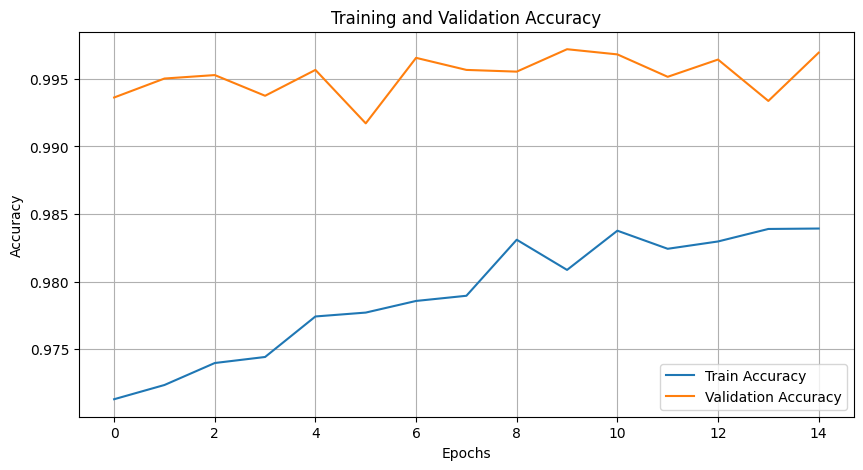

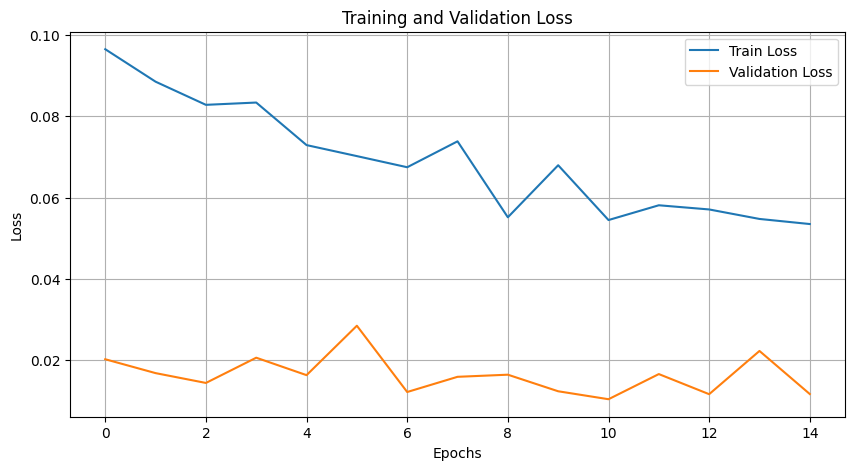

In [29]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=43)
y_val_encoded = to_categorical(y_val, num_classes=43)

# Check the shapes to ensure correctness
print("Shape of y_train_encoded:", y_train_encoded.shape)
print("Shape of y_val_encoded:", y_val_encoded.shape)

# Compile the model with categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    aug.flow(X_train, y_train_encoded, batch_size=32),
    epochs=15,
    validation_data=(X_val, y_val_encoded)
)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [30]:
# history=model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=15, validation_data=(X_val, y_val))

# # Accuracy plot
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # Loss plot
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()
